# Cifar10 Challenge 
This challenge is set up to help you understand the basics of neural networks. Your task is to try and get the highest possible accuracy by altering and making changes to your training model.
Once you think you have achieved a high enough accuracy, let one of the tutors know and we will keep a record of it to see who achieved the highest score. Goodluck :)

We first start off importing the necessary libraries and functions that we require.



In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

The below line of code %matplotlib inline allows us to show our plots in jupyter notebooks.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Hyperparameters

EPOCH: One epoch is defined as one examination of the whole dataset. So if we have 100 epochs, the neural network has examined the dataset 100 times during training.

BATCH SIZE: A batch is how many training examples is seen at a time. Essentially during training, you won't be able examine the whole dataset at once (unless it is really small). We split the dataset into batches (hence the name) so the neural network is able to learn what is happpening. This is one of the most important parameters that you will be tweaking a lot and we will go through more next lesson.

N_NEURONS: This determines how many neurons/cells or the output dimensions after each layer. This is important to general



In [3]:
#Play around with these values to achieve ideal accuracy
EPOCH = 30
BATCH_SIZE = 32
N_NEURONS = 500


## Splitting your Dataset

Training: Used as examples where our neural network will learn

Testing: Used as a seperate and independent dataset to see how well our neural network works (This part of the dataset is essentially 'unseen' examples)

Validation: Used during the training to assess how well our training is. This is important as we should be assessing how well our neural network is learning and 'quizzing it' on examples that it has not seen. 

In [4]:
(train_examples, train_labels), (test_examples, test_labels) = cifar10.load_data()

## Visualising the Dataset

The number indicated from the label of the image example corresponds to the class the image is associated with. 

https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

The dataset contains 10 different classes: 
airplane
automobile
bird
cat
deer										
dog										
frog										
horse										
ship										
truck

The size of the image is: (32, 32, 3)
The label for the image example is: [6]


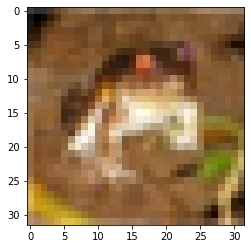

The size of the image is: (32, 32, 3)
The label for the image example is: [9]


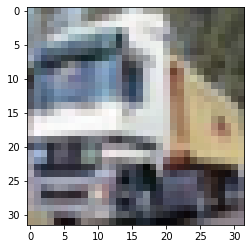

The size of the image is: (32, 32, 3)
The label for the image example is: [9]


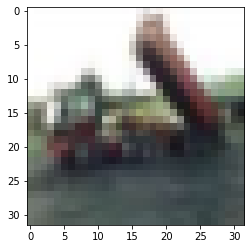

In [5]:
for num in range(0,3):
    print('The size of the image is: ' + str(train_examples[num].shape))
    plt.imshow(train_examples[num])
    print('The label for the image example is: ' + str(train_labels[num]))
    plt.show()

## Transforming the data
In order to let our simple neural network understand the training examples, we have to apply some transformations. We will go through more the techniques later during the studios. But essentially, we convert the shape of the data, format it to a float32 data strcuture and normalise the pixel values.

The shape of the data is determined through the information provided with the dataset. The first parameter for reshaping refers to the size of the dataset, in this case we have 50,000 images set for training. The second parameter for reshaping the data refers to the data structure, in this case the training examples have a data structure of 3 * 32 * 32 = 3072.

In [6]:
train_examples = train_examples.reshape(50000, 3072)
test_examples = test_examples.reshape(10000, 3072)
train_examples = train_examples.astype('float32')
test_examples = test_examples.astype('float32')
train_examples /= 255
test_examples /= 255
print(train_examples.shape[0], 'train samples')
print(test_examples.shape[0], 'test samples')
print('The shape of each example is: ' + str(train_examples.shape))
input_shape = train_examples.shape[1]
print(input_shape)

50000 train samples
10000 test samples
The shape of each example is: (50000, 3072)
3072


## One-hot-encoding
In order to make the 'math' work for categorical data during our training process; it is typical to apply one-hot-encoding. Since we have 10 possible outputs, we map out a 10 position-vector. All the positions of the vectors are 0 except for the specific label. As for example, the label '0', would have a vector with the first cell equal to 1. To visualise how it looks, there are some print statements before and after the encoding transformation. We use the numpy library to help us out with that. 


In [7]:
num_classes = 10
print(train_labels[0])
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
print(train_labels[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Compiling the model
Below we start defining and building the neural network model that we will be using to train. At the end, we will call the function model.summary() to see how it sort of looks. 

Improve your model by adding additional layers and number of neurons. This increases the complexity of the neural network which allows it to learn more, but takes longer to train and run. This is generally a rule of thumb, you ideally want the lightest and most accurate model that solves the problem. The number of epochs above is sufficient since the problem that we are trying to solve is quite simple, but in many cases for the later deep neural networks are quite huge and deep; taking a larger time to train. This is why neural networks are called 'deep neural networks'; they have multiple layers that replicate how our neurons work in our brain. Since we have 10 outputs, we need to ensure that the last layer should replicate that.



In [12]:
# Play around with your model alongside the hyperparameters and see if you can achieve the highest accuracy.
# A simple model has been provided for you to get you started
from tensorflow.keras.layers import Dropout
OUTPUT_NEURONS = 10
model = Sequential()
model.add(Dense(N_NEURONS, input_shape=(input_shape,)))
model.add(Dense(N_NEURONS, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(OUTPUT_NEURONS))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 2,042,510
Trainable params: 2,042,510
Non-trainable params: 0
____________________________________________

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

## Training
Let's start training now. Below we indicated that during our training, we will split 20% of it that will be dedicated as the validation dataset.

In [14]:
model_history = model.fit(train_examples, train_labels,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCH,
                    verbose=1,
                    validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 62s 2ms/sample - loss: 2.0246 - accuracy: 0.2694 - val_loss: 1.9097 - val_accuracy: 0.3166
Epoch 2/10
40000/40000 [==============================] - 34s 849us/sample - loss: 1.8387 - accuracy: 0.3474 - val_loss: 1.7926 - val_accuracy: 0.3672
Epoch 3/10
40000/40000 [==============================] - 31s 787us/sample - loss: 1.7590 - accuracy: 0.3784 - val_loss: 1.7500 - val_accuracy: 0.3790
Epoch 4/10
40000/40000 [==============================] - 33s 833us/sample - loss: 1.6944 - accuracy: 0.3979 - val_loss: 1.6841 - val_accuracy: 0.3995
Epoch 5/10
40000/40000 [==============================] - 32s 806us/sample - loss: 1.6480 - accuracy: 0.4135 - val_loss: 1.6404 - val_accuracy: 0.4153
Epoch 6/10
40000/40000 [==============================] - 34s 842us/sample - loss: 1.6078 - accuracy: 0.4296 - val_loss: 1.6124 - val_accuracy: 0.4218
Epoch 7/10
40000/40000 [======================

## Evaluating your model
Once we have a trained model, we now evaluate it to see how well our model performs on our test dataset. 

In [ ]:
model_score = model.evaluate(test_examples, test_labels, verbose=2)